# **Práctica 3: Análisis exploratorio de datos**

Nombre: Osvaldo Ibañez Guzman

No. Cuenta: 316058672

Email: osva552920@gmail.com

USAR A AERMOEXICO Y OTRAS 3 EMPRESAS MEXICANAS

### **Contexto**

Yahoo Finance ofrece una amplia variedad de datos de mercado sobre acciones, bonos, divisas y criptomonedas. También proporciona informes de noticias con varios puntos de vista sobre diferentes mercados de todo el mundo, todos accesibles a través de la biblioteca yfinance.

**Objetivo:** Hacer un análisis exploratorio de datos con base en información obtenida de Yahoo Finanzas. Por ejemplo, datos de Spotify, Facebook, Amazon y Aeromexico.

**Fuente de datos**

De Yahoo Finanzas se utiliza el Ticker -Etiqueta de cotización- de la acción bursatil.

### **Importar las bibliotecas y los datos**

In [1]:
#!pip install googlefinance
!pip install yfinance

In [2]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline             
# Para generar y almacenar los gráficos dentro del cuaderno
import yfinance as yf

In [3]:
# Bachoco
# Se deben usar empresas mexicanas
DataBachoco = yf.Ticker('BACHOCOB.MX')
DataBachoco

yfinance.Ticker object <BACHOCOB.MX>

In [4]:
BachocoHist = DataBachoco.history(start = '2019-1-1', end = '2022-9-19', interval = '1d')
BachocoHist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,61.360901,62.802478,60.022287,62.493572,76323,0.0,0
2019-01-03,61.360897,62.044241,60.855406,61.201756,64983,0.0,0
2019-01-04,61.051987,64.318949,61.051987,63.354774,400430,0.0,0
2019-01-07,63.195648,65.217605,62.999069,63.298618,564164,0.0,0
2019-01-08,63.130117,64.552975,62.877368,63.420303,68198,0.0,0
...,...,...,...,...,...,...,...
2022-09-09,79.610001,79.889999,79.599998,79.690002,36495,0.0,0
2022-09-12,79.599998,80.000000,79.449997,79.519997,497214,0.0,0
2022-09-13,79.500000,80.050003,79.110001,79.379997,1022244,0.0,0


Descripción:

* En el comercio de acciones, 'alto' y 'bajo' se refieren a los precios máximos y mínimos en un período determinado.
* 'Apertura' y 'cierre' son los precios en los que una acción comenzó y terminó cotizando en el mismo período. 
* El 'volumen' es la cantidad total de la actividad comercial. 
* Los valores ajustados tienen en cuenta las acciones corporativas, como los 'dividendos', la 'división de acciones' y la emisión de nuevas acciones.

In [5]:
BachocoHist.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,61.360901,62.802478,60.022287,62.493572,76323,0.0,0
2019-01-03,61.360897,62.044241,60.855406,61.201756,64983,0.0,0
2019-01-04,61.051987,64.318949,61.051987,63.354774,400430,0.0,0
2019-01-07,63.195648,65.217605,62.999069,63.298618,564164,0.0,0
2019-01-08,63.130117,64.552975,62.877368,63.420303,68198,0.0,0
2019-01-09,63.663675,65.517135,63.298599,64.768265,596989,0.0,0
2019-01-10,64.590415,65.966473,64.178532,64.552971,242466,0.0,0
2019-01-11,64.169168,66.500037,64.169168,66.266014,229750,0.0,0
2019-01-14,65.994550,68.362864,65.910305,67.876099,244698,0.0,0


### **Paso 1: Descripción de la estructura de los datos**

1) Forma (dimensiones) del DataFrame

El atributo .shape de Pandas proporciona una estructura general de los datos. Devuelve la cantidad de filas y columnas que tiene el conjunto de datos.

In [6]:
BachocoHist.shape

(936, 7)

2) Tipos de datos (variables)

El atributo .dtypes muestra los tipos de datos de las columnas (variables y tipos).

In [7]:
BachocoHist.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits      int64
dtype: object

Se observa que los datos son numéricos (flotante y entero).

### **Paso 2: Identificación de datos faltantes**

Una función útil de pandas es **.isnull().sum()** que regresa la suma de todos los valores nulos en cada variable.

In [8]:
BachocoHist.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Podemos observar que no existen valores nulos en esta muestra de datos

También se puede usar **info()** para obtener el tipo de datos y la suma de valores nulos.

In [9]:
BachocoHist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 936 entries, 2019-01-02 to 2022-09-15
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          936 non-null    float64
 1   High          936 non-null    float64
 2   Low           936 non-null    float64
 3   Close         936 non-null    float64
 4   Volume        936 non-null    int64  
 5   Dividends     936 non-null    float64
 6   Stock Splits  936 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 58.5 KB


### **Paso 3: Detección de valores atípicos**

Se pueden utilizar gráficos para tener una idea general de las distribuciones de los datos, y se sacan estadísticas para resumir los datos. Estas dos estrategias son recomendables y se complementan.

La distribución se refiere a cómo se distribuyen los valores en una variable o con qué frecuencia ocurren.

Para las variables numéricas, se observa cuántas veces aparecen grupos de números en una columna. Mientras que para las variables categóricas, son las clases de cada columna y su frecuencia.

**1) Distribución de variables numéricas**

* Se utilizan histogramas que agrupan los números en rangos.
* La altura de una barra muestra cuántos números caen en ese rango. 
* Se emplea **hist()** para trazar el histograma de las variables numéricas. También se pueden usar los parámetros: **figsize** y **xrot** para aumentar el tamaño de la cuadrícula y rotar el eje x 45 grados.

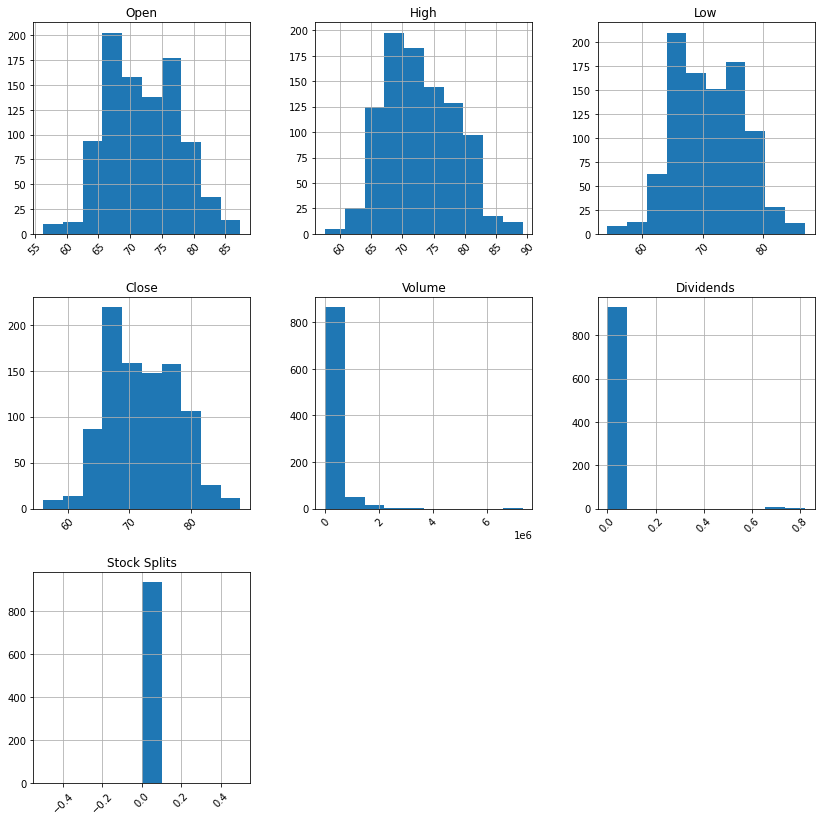

In [10]:
BachocoHist.hist(figsize=(14,14), xrot=45)
plt.show()

**Qué buscar:**

* Posibles valores atípicos, que pueden ser errores de medición.
* Límites que no tienen sentido, como valores porcentuales > 100.

En el histograma se observa que **Volume** tiene valores sesgados a la izquierda. Las variables **Dividens** y **Stock Splits** presentan valores en 'cero'.

**2) Resumen estadístico de variables numéricas**

Se sacan estadísticas usando **describe()** que muestra un resumen estadístico de las variables numéricas.

In [11]:
BachocoHist.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,936.000000,936.000000,936.000000,936.000000,9.360000e+02,936.000000,936.0
mean,71.970277,72.766311,71.088340,71.944658,2.792215e+05,0.005299,0.0
std,5.667321,5.634105,5.687990,5.692017,4.317420e+05,0.061231,0.0
min,56.309682,57.624082,54.271410,55.966793,0.000000e+00,0.000000,0.0
25%,67.373903,68.172860,66.507212,67.276981,7.232875e+04,0.000000,0.0
50%,71.544575,72.368562,70.714461,71.550026,1.551165e+05,0.000000,0.0
75%,76.190202,76.819681,75.537580,76.191933,3.161140e+05,0.000000,0.0
max,87.360016,89.245884,86.883784,88.045792,7.330487e+06,0.820000,0.0


* Se incluye un recuento, media, desviación, valor mínimo, valor máximo, percentil inferior (25%), 50% y percentil superior (75%).
* Por defecto, el percentil 50 es lo mismo que la mediana.
* Se observa que para cada variable, el recuento también ayuda a identificar variables con valores nulos o vacios. Estos son: **Dividends** y **Stock Splits**.

**3) Diagramas para detectar posibles valores atípicos**

Para este tipo de gráficos se utiliza **Seaborn**, que permite generar diagramas de cajas para detectar valores atípicos.

D:\Users\osva_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


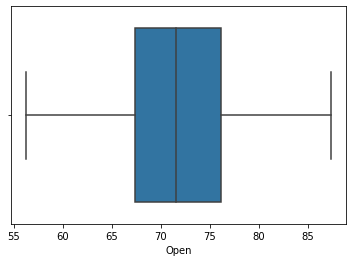

D:\Users\osva_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


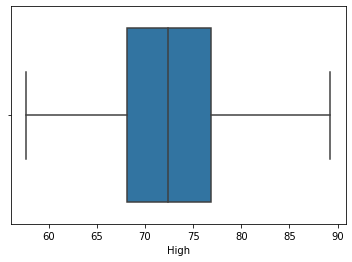

D:\Users\osva_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


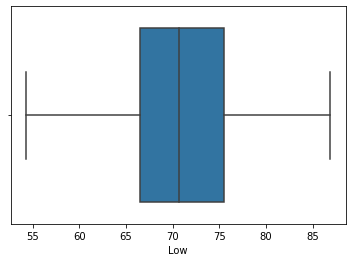

D:\Users\osva_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


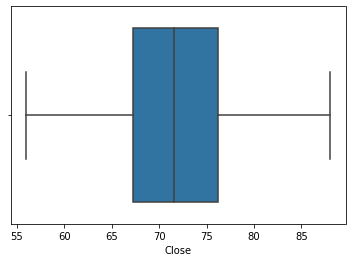

D:\Users\osva_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


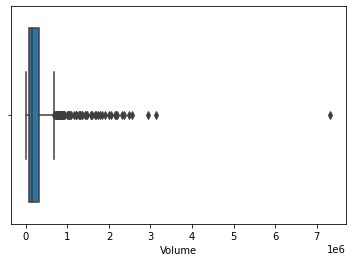

In [12]:
VariablesValoresAtipicos = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in VariablesValoresAtipicos:
  sns.boxplot(col, data=BachocoHist)
  plt.show()

Se observa que en Volume se tienen valores atípicos que están lejos de los otros valores.

**3. Plot**

* Para este tipo de gráficos se utiliza Seaborn, que permite generar un histograma para variables categóricas. Cada barra en el gráfico de conteo representa una clase.
* Se crea un bucle para el conteo y distribución de las clases. La sentencia select_dtypes(include = ’object’) selecciona las columnas categóricas con sus valores y las muestra.
* Se incluye también If para elegir solo las tres columnas con 10 o menos clases usando series.**nunique() < 10**.


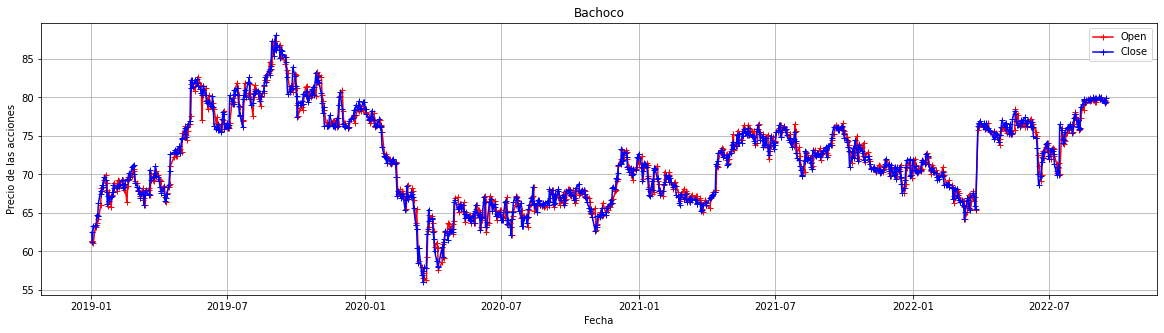

In [13]:
plt.figure(figsize=(20, 5))
plt.plot(BachocoHist['Open'], color='red', marker='+', label='Open')
plt.plot(BachocoHist['Close'], color='blue', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Bachoco')
plt.grid(True)
plt.legend()
plt.show()

### **Paso 4: Identificación de relaciones entre pares variables**

Una matriz de correlaciones es útil para analizar la relación entre las variables numéricas.
Se emplea la función corr()

In [14]:
BachocoHist.corr()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Open,1.000000,0.987856,0.990425,0.984848,0.046145,0.014918,NaN
High,0.987856,1.000000,0.985749,0.992923,0.064323,0.026821,NaN
Low,0.990425,0.985749,1.000000,0.991688,0.033322,0.018516,NaN
Close,0.984848,0.992923,0.991688,1.000000,0.051169,0.028433,NaN
Volume,0.046145,0.064323,0.033322,0.051169,1.000000,-0.008350,NaN
Dividends,0.014918,0.026821,0.018516,0.028433,-0.008350,1.000000,NaN
Stock Splits,NaN,NaN,NaN,NaN,NaN,NaN,NaN


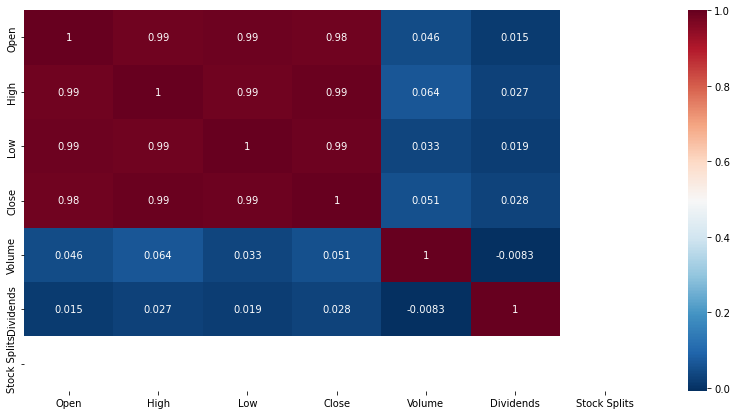

In [15]:
plt.figure(figsize=(14,7))
sns.heatmap(BachocoHist.corr(), cmap='RdBu_r', annot=True)
plt.show()

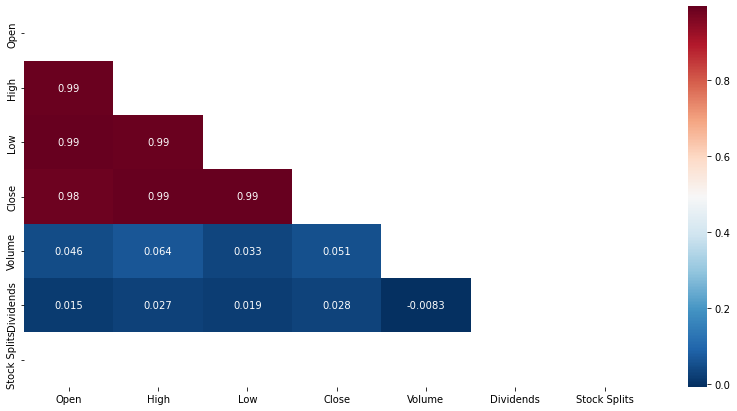

In [16]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(BachocoHist.corr())
sns.heatmap(BachocoHist.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

* Una correlación es un valor entre -1 y 1 que equivale a qué tan cerca se mueven simultáneamente los valores de dos variables. 
* Una correlación positiva significa que a medida que una característica aumenta, la otra también aumenta.
* Una correlación negativa significa que a medida que una característica disminuye, la otra también disminuye. 
* Las correlaciones cercanas a 0 indican una relación débil, mientras que las más cercanas a -1 o 1 significan una relación fuerte.


### Se incluyen otras fuentes de datos

In [17]:
# Para Bimbo
DataBimbo = yf.Ticker('BIMBOA.MX')

In [18]:
BimboHist = DataBimbo.history(start = '2019-1-1', end = '2022-9-19', interval='1d')
BimboHist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,36.489381,37.147865,36.291837,36.987946,925915,0.0,0
2019-01-03,36.724553,37.279561,36.301242,36.987946,1574973,0.0,0
2019-01-04,37.016166,37.345410,36.479973,37.053795,1882812,0.0,0
2019-01-07,36.865655,37.241932,36.498786,36.790401,1567381,0.0,0
2019-01-08,37.157271,37.157271,36.592858,36.931503,1776183,0.0,0
...,...,...,...,...,...,...,...
2022-09-09,72.440002,73.360001,71.400002,73.029999,1144724,0.0,0
2022-09-12,73.540001,74.239998,73.150002,73.699997,869317,0.0,0
2022-09-13,73.410004,74.050003,72.300003,73.029999,1762960,0.0,0


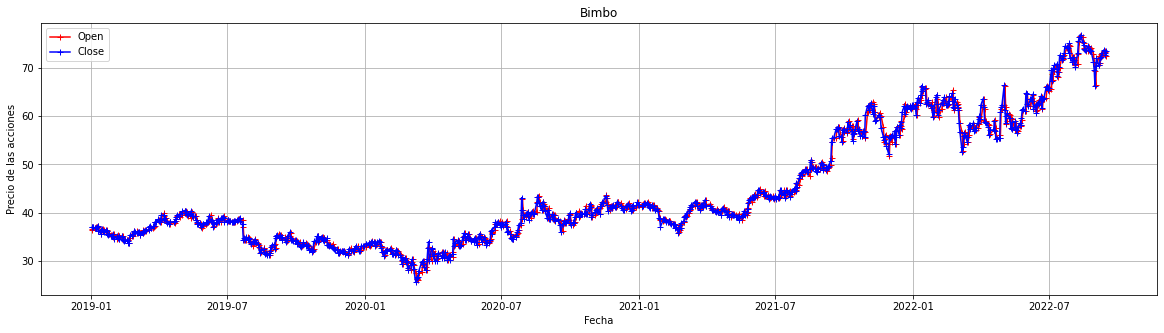

In [19]:
plt.figure(figsize=(20, 5))
plt.plot(BimboHist['Open'], color='red', marker='+', label='Open')
plt.plot(BimboHist['Close'], color='blue', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Bimbo')
plt.grid(True)
plt.legend()
plt.show()

In [20]:
# Para CEMEX
DataCemex = yf.Ticker('CEMEXCPO.MX')

In [21]:
CemexHist = DataCemex.history(start = '2019-1-1', end = '2022-9-19', interval='1d')
CemexHist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,9.211400,9.542816,9.201652,9.523321,11805436,0.0,0
2019-01-03,9.464835,9.523321,9.250390,9.338118,19429709,0.0,0
2019-01-04,9.396603,9.542816,9.260138,9.367360,18881858,0.0,0
2019-01-07,9.386856,9.679281,9.240642,9.640291,20506020,0.0,0
2019-01-08,9.698775,9.883979,9.650038,9.854735,35977574,0.0,0
...,...,...,...,...,...,...,...
2022-09-09,7.710000,7.920000,7.710000,7.880000,10737320,0.0,0
2022-09-12,7.910000,8.050000,7.900000,8.000000,11344674,0.0,0
2022-09-13,7.880000,7.930000,7.680000,7.720000,11104198,0.0,0


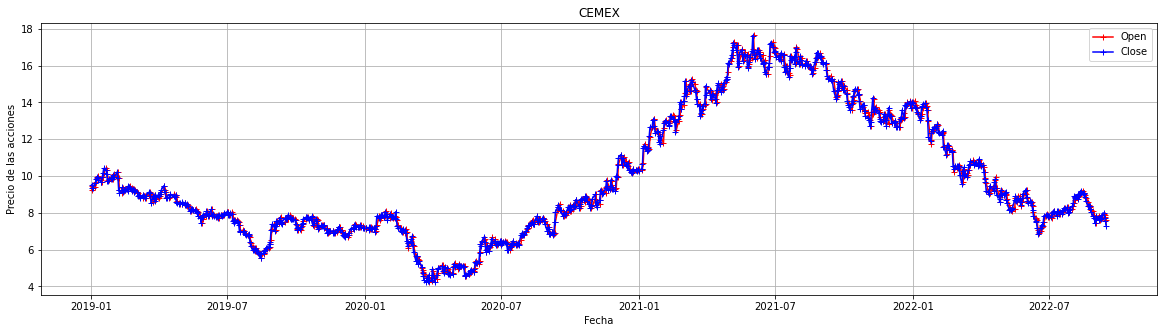

In [22]:
plt.figure(figsize=(20, 5))
plt.plot(CemexHist['Open'], color='red', marker='+', label='Open')
plt.plot(CemexHist['Close'], color='blue', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('CEMEX')
plt.grid(True)
plt.legend()
plt.show()

In [23]:
# Para Aeroméxico
DataAeromex = yf.Ticker('AEROMEX.MX')

In [24]:
AeromexHist = DataAeromex.history(start = '2019-1-1', end = '2022-9-19', interval='1d')
AeromexHist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,22.000000,23.080000,22.000000,22.530001,54890,0,0
2019-01-03,22.500000,23.049999,22.500000,22.770000,88098,0,0
2019-01-04,23.430000,23.840000,22.780001,23.160000,69569,0,0
2019-01-07,23.180000,24.500000,23.100000,23.270000,160120,0,0
2019-01-08,23.219999,23.870001,22.820000,23.230000,190421,0,0
...,...,...,...,...,...,...,...
2022-09-09,193.029999,193.029999,193.029999,193.029999,0,0,0
2022-09-12,190.630005,195.500000,190.309998,195.500000,1681,0,0
2022-09-13,195.500000,195.500000,195.500000,195.500000,0,0,0


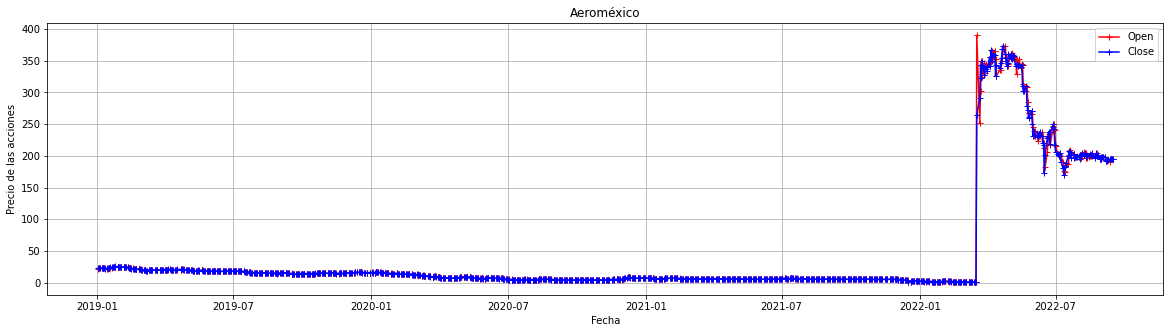

In [25]:
plt.figure(figsize=(20, 5))
plt.plot(AeromexHist['Open'], color='red', marker='+', label='Open')
plt.plot(AeromexHist['Close'], color='blue', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Aeroméxico')
plt.grid(True)
plt.legend()
plt.show()

### Integración

In [26]:
BachocoClose = BachocoHist.drop(columns = ['Open', 'High', 'Low', 'Volume', 
                                        'Dividends', 'Stock Splits'])
BachocoClose.rename(columns = {'Close': 'Bachoco'}, inplace = True)
BachocoClose

,Bachoco
Date,
2019-01-02,62.493572
2019-01-03,61.201756
2019-01-04,63.354774
2019-01-07,63.298618
2019-01-08,63.420303
...,...
2022-09-09,79.690002
2022-09-12,79.519997
2022-09-13,79.379997


In [27]:
BimboClose = BimboHist.drop(columns = ['Open', 'High', 'Low', 'Volume', 
                                        'Dividends', 'Stock Splits'])
BimboClose.rename(columns = {'Close': 'Bimbo'}, inplace = True)
BimboClose

,Bimbo
Date,
2019-01-02,36.987946
2019-01-03,36.987946
2019-01-04,37.053795
2019-01-07,36.790401
2019-01-08,36.931503
...,...
2022-09-09,73.029999
2022-09-12,73.699997
2022-09-13,73.029999


In [28]:
CemexClose = CemexHist.drop(columns = ['Open', 'High', 'Low', 'Volume', 
                                        'Dividends', 'Stock Splits'])
CemexClose.rename(columns = {'Close': 'Cemex'}, inplace = True)
CemexClose

,Cemex
Date,
2019-01-02,9.523321
2019-01-03,9.338118
2019-01-04,9.367360
2019-01-07,9.640291
2019-01-08,9.854735
...,...
2022-09-09,7.880000
2022-09-12,8.000000
2022-09-13,7.720000


In [29]:
AeromexClose = AeromexHist.drop(columns = ['Open', 'High', 'Low', 'Volume', 
                                        'Dividends', 'Stock Splits'])
AeromexClose.rename(columns = {'Close': 'Aeromexico'}, inplace = True)
AeromexClose

,Aeromexico
Date,
2019-01-02,22.530001
2019-01-03,22.770000
2019-01-04,23.160000
2019-01-07,23.270000
2019-01-08,23.230000
...,...
2022-09-09,193.029999
2022-09-12,195.500000
2022-09-13,195.500000


In [30]:
# Se integran los cierres del precio de las acciones
Acciones = pd.concat([BachocoClose, BimboClose, CemexClose, AeromexClose], 
                      axis = 'columns', join = 'inner')
Acciones

,Bachoco,Bimbo,Cemex,Aeromexico
Date,,,,
2019-01-02,62.493572,36.987946,9.523321,22.530001
2019-01-03,61.201756,36.987946,9.338118,22.770000
2019-01-04,63.354774,37.053795,9.367360,23.160000
2019-01-07,63.298618,36.790401,9.640291,23.270000
2019-01-08,63.420303,36.931503,9.854735,23.230000
...,...,...,...,...
2022-09-09,79.690002,73.029999,7.880000,193.029999
2022-09-12,79.519997,73.699997,8.000000,195.500000
2022-09-13,79.379997,73.029999,7.720000,195.500000


In [31]:
# En caso de tener valores nulos
AccionesNN = Acciones.dropna()
AccionesNN

,Bachoco,Bimbo,Cemex,Aeromexico
Date,,,,
2019-01-02,62.493572,36.987946,9.523321,22.530001
2019-01-03,61.201756,36.987946,9.338118,22.770000
2019-01-04,63.354774,37.053795,9.367360,23.160000
2019-01-07,63.298618,36.790401,9.640291,23.270000
2019-01-08,63.420303,36.931503,9.854735,23.230000
...,...,...,...,...
2022-09-09,79.690002,73.029999,7.880000,193.029999
2022-09-12,79.519997,73.699997,8.000000,195.500000
2022-09-13,79.379997,73.029999,7.720000,195.500000


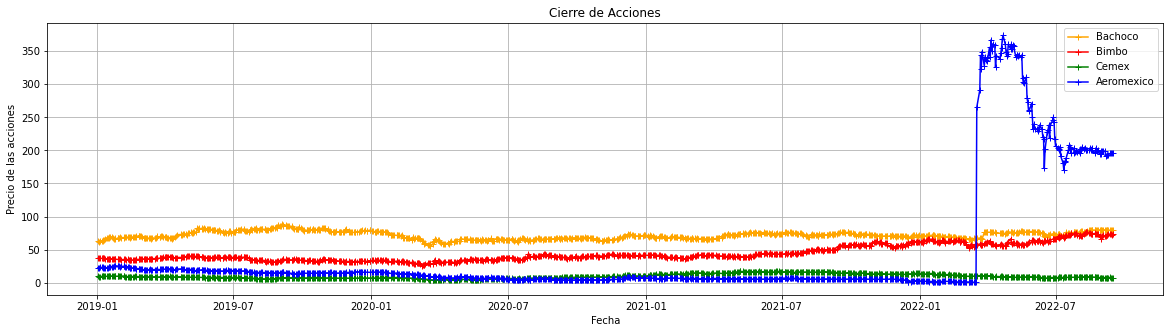

In [32]:
plt.figure(figsize=(20, 5))
plt.plot(Acciones['Bachoco'], color='orange', marker='+', label='Bachoco')
plt.plot(Acciones['Bimbo'], color='red', marker='+', label='Bimbo')
plt.plot(Acciones['Cemex'], color='green', marker='+', label='Cemex')
plt.plot(Acciones['Aeromexico'], color='blue', marker='+', label='Aeromexico')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Cierre de Acciones')
plt.grid(True)
plt.legend()
plt.show()

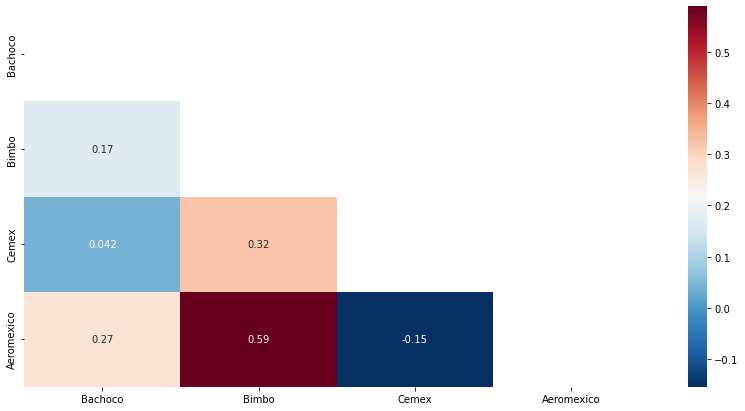

In [33]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(Acciones.corr())
sns.heatmap(Acciones.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

In [34]:
Acciones.corr()

,Bachoco,Bimbo,Cemex,Aeromexico
Bachoco,1.000000,0.168919,0.042199,0.269485
Bimbo,0.168919,1.000000,0.324019,0.588815
Cemex,0.042199,0.324019,1.000000,-0.153905
Aeromexico,0.269485,0.588815,-0.153905,1.000000


In [35]:
DataAcciones = yf.download(['BACHOCOB.MX', 'BIMBOA.MX', 'CEMEXCPO.MX', 'AEROMEX.MX'], start='2019-1-1', end='2022-9-19', 
                   interval='1d')
DataAcciones

[*********************100%***********************]  4 of 4 completed


Adj Close                                          Close  \
            AEROMEX.MX BACHOCOB.MX  BIMBOA.MX CEMEXCPO.MX  AEROMEX.MX   
Date                                                                    
2019-01-02   22.530001   62.493568  36.987942    9.523321   22.530001   
2019-01-03   22.770000   61.201752  36.987942    9.338118   22.770000   
2019-01-04   23.160000   63.354767  37.053795    9.367360   23.160000   
2019-01-07   23.270000   63.298607  36.790401    9.640291   23.270000   
2019-01-08   23.230000   63.420296  36.931499    9.854735   23.230000   
...                ...         ...        ...         ...         ...   
2022-09-09  193.029999   79.690002  73.029999    7.880000  193.029999   
2022-09-12  195.500000   79.519997  73.699997    8.000000  195.500000   
2022-09-13  195.500000   79.379997  73.029999    7.720000  195.500000   
2022-09-14  195.500000   79.239998  72.650002    7.560000  195.500000   
2022-09-15  195.500000   79.919998  73.449997    7.260000  195.500000   

                                                     High              ...  \
           BACHOCOB.MX  BIMBOA.MX CEMEXCPO.MX  AEROMEX.MX BACHOCOB.MX  ...   
Date                                                                   ...   
2019-01-02   66.760002  39.320000        9.77   23.080000   67.089996  ...   
2019-01-03   65.379997  39.320000        9.58   23.049999   66.279999  ...   
2019-01-04   67.680000  39.389999        9.61   23.840000   68.709999  ...   
2019-01-07   67.620003  39.110001        9.89   24.500000   69.669998  ...   
2019-01-08   67.750000  39.259998       10.11   23.870001   68.959999  ...   
...                ...        ...         ...         ...         ...  ...   
2022-09-09   79.690002  73.029999        7.88  193.029999   79.889999  ...   
2022-09-12   79.519997  73.699997        8.00  195.500000   80.000000  ...   
2022-09-13   79.379997  73.029999        7.72  195.500000   80.050003  ...   
2022-09-14   79.239998  72.650002        7.56  195.500000   79.709999  ...   
2022-09-15   79.919998  73.449997        7.26  195.500000   80.120003  ...   

                  Low                    Open                         \
            BIMBOA.MX CEMEXCPO.MX  AEROMEX.MX BACHOCOB.MX  BIMBOA.MX   
Date                                                                   
2019-01-02  38.580002        9.44   22.000000   65.550003  38.790001   
2019-01-03  38.590000        9.49   22.500000   65.550003  39.040001   
2019-01-04  38.779999        9.50   23.430000   65.220001  39.349998   
2019-01-07  38.799999        9.48   23.180000   67.510002  39.189999   
2019-01-08  38.900002        9.90   23.219999   67.440002  39.500000   
...               ...         ...         ...         ...        ...   
2022-09-09  71.400002        7.71  193.029999   79.610001  72.440002   
2022-09-12  73.150002        7.90  190.630005   79.599998  73.540001   
2022-09-13  72.300003        7.68  195.500000   79.500000  73.410004   
2022-09-14  71.709999        7.53  195.500000   79.709999  73.269997   
2022-09-15  72.209999        7.21  195.500000   79.389999  72.519997   

                           Volume                                    
           CEMEXCPO.MX AEROMEX.MX BACHOCOB.MX BIMBOA.MX CEMEXCPO.MX  
Date                                                                 
2019-01-02        9.45      54890       76323    925915    11805436  
2019-01-03        9.71      88098       64983   1574973    19429709  
2019-01-04        9.64      69569      400430   1882812    18881858  
2019-01-07        9.63     160120      564164   1567381    20506020  
2019-01-08        9.95     190421       68198   1776183    35977574  
...                ...        ...         ...       ...         ...  
2022-09-09        7.71          0       36495   1144724    10737320  
2022-09-12        7.91       1681      497214    869317    11344674  
2022-09-13        7.88          0     1022244   1762960    11104198  
2022-09-14        7.77          0     2546708   